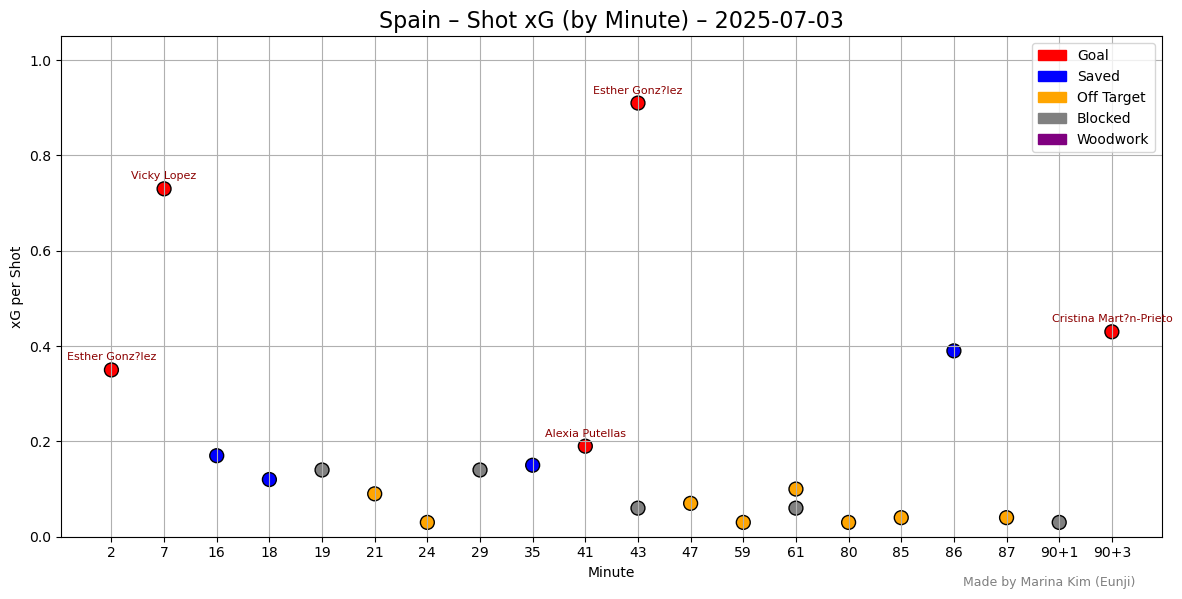

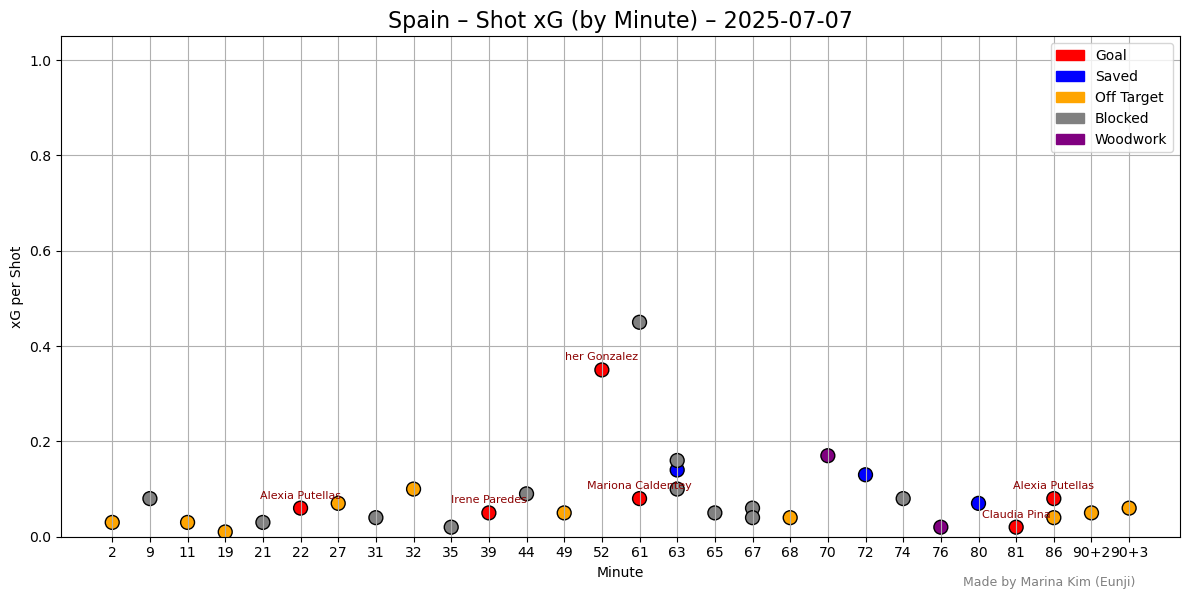

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 데이터 불러오기
df = pd.read_csv("spain_shots.csv")  # 또는 df = pd.read_excel("spain_shots.xlsx")

# 색상 지정 함수
def outcome_color(outcome):
    return {
        'Goal': 'red',
        'Saved': 'blue',
        'Off Target': 'orange',
        'Blocked': 'gray',
        'Woodwork': 'purple'
    }.get(outcome, 'black')

df['Color'] = df['Outcome'].apply(outcome_color)

# Date 컬럼을 날짜로 변환
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

# 경기별 분리 및 저장
for date, match_df in df.groupby('Date'):
    spain_df = match_df[match_df['Squad'] == 'Spain']

    fig, ax = plt.subplots(figsize=(12, 6))  # ✅ fig 객체로 받아오기

    # 슈팅 점 표시
    scatter = ax.scatter(
        spain_df['Minute'], spain_df['xG'],
        c=spain_df['Color'], s=100, edgecolors='black'
    )

    # 골 텍스트 추가
    for _, row in spain_df.iterrows():
        if row['Outcome'] == 'Goal':
            ax.text(row['Minute'], row['xG'] + 0.02, row['Player'],
                    fontsize=8, ha='center', color='darkred')

    # 제목 및 축 설정
    ax.set_title(f"Spain – Shot xG (by Minute) – {date.strftime('%Y-%m-%d')}", fontsize=16)
    ax.set_xlabel("Minute")
    ax.set_ylabel("xG per Shot")
    ax.set_ylim(0, 1.05)
    ax.grid(True)

    # 범례
    legend_elements = [
        mpatches.Patch(color='red', label='Goal'),
        mpatches.Patch(color='blue', label='Saved'),
        mpatches.Patch(color='orange', label='Off Target'),
        mpatches.Patch(color='gray', label='Blocked'),
        mpatches.Patch(color='purple', label='Woodwork')
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    # 출처 텍스트
    fig.text(0.95, 0.01, 'Made by Marina Kim (Eunji)',
             ha='right', va='bottom', fontsize=9, color='gray')

    # 레이아웃 조정 및 저장
    fig.tight_layout()

    # 파일명 생성
    filename = f"spain_xg_{date.strftime('%Y%m%d')}.png"
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
